##Import library to load data


In [2]:
import pandas as pd
Data = pd.read_excel ("C:\\Users\\USER\\Documents\\Prediction of fault\\TCN DATA.xlsx")
Data.head(30)

,Highest Frequency,Lowest Frequency,Highest Voltage,Lowest Voltage,PEAK GENERATION,LOWEST GENERATION,INTERRUPTED POWER,EQUIPMENT HEALTH,WEATHER CONDITION,FAULTS,TRANSMISSION LINE
0,50.000,49.000,349.0,300.0,4531.50,3784.70,414,Nil,RAINFALL,YES,Omotosho/Ikeja-West 330kV line
1,50.847,49.010,349.0,300.0,4482.50,3955.47,Nil,Nil,RAINFALL,Nil,Nil
2,50.983,49.010,358.0,300.0,4579.60,3231.80,Nil,POWER TRANSFORMER,RAINFALL,Nil,Nil
3,50.960,49.010,353.0,300.0,4552.76,3890.10,483.7,CIRCUIT BREAKER,RAINFALL,YES,Osogbo/Ikeja-West 330kV line
4,50.820,49.010,355.0,300.0,4204.80,3929.00,373.8,Nil,RAINFALL,YES,Shiroro/Katampe 330kV line
5,50.710,49.012,350.0,300.0,4275.24,3853.50,148.7,INSULATOR,RAINFALL,Nil,Nil
6,50.629,49.000,347.0,300.0,4372.20,3989.50,24,Nil,RAINFALL,Nil,Nil
7,50.551,49.029,345.0,300.0,4657.90,4104.72,231,Nil,RAINFALL,YES,Benin/Ajaokuta 330kV line 2
8,50.720,49.479,360.0,300.0,4634.80,3533.90,Nil,Nil,RAINFALL,Nil,Nil
9,51.140,49.145,352.0,300.0,4484.24,3329.80,92,Nil,RAINFALL,YES,Onitsha/Alaoji 330kV line


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   181 non-null    float64
 1   Lowest Frequency    181 non-null    float64
 2   Highest Voltage     181 non-null    float64
 3   Lowest Voltage      181 non-null    float64
 4   PEAK GENERATION     183 non-null    float64
 5   LOWEST GENERATION   181 non-null    float64
 6   INTERRUPTED POWER   181 non-null    object 
 7   EQUIPMENT HEALTH    181 non-null    object 
 8   WEATHER CONDITION   179 non-null    object 
 9   FAULTS              181 non-null    object 
 10  TRANSMISSION LINE   181 non-null    object 
dtypes: float64(6), object(5)
memory usage: 31.5+ KB


Handling missing values


In [4]:
Data.fillna(method='ffill', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6552\3615870388.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data.fillna(method='ffill', inplace=True)


In [5]:
Data.head(10)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   365 non-null    float64
 1   Lowest Frequency    365 non-null    float64
 2   Highest Voltage     365 non-null    float64
 3   Lowest Voltage      365 non-null    float64
 4   PEAK GENERATION     365 non-null    float64
 5   LOWEST GENERATION   365 non-null    float64
 6   INTERRUPTED POWER   365 non-null    object 
 7   EQUIPMENT HEALTH    365 non-null    object 
 8   WEATHER CONDITION   365 non-null    object 
 9   FAULTS              365 non-null    object 
 10  TRANSMISSION LINE   365 non-null    object 
dtypes: float64(6), object(5)
memory usage: 31.5+ KB


In [6]:
import numpy as np
# Convert column to numeric
Data['INTERRUPTED POWER'] = pd.to_numeric(
    Data['INTERRUPTED POWER'], errors='coerce'
)

Using skewness to choose between mean ore median 

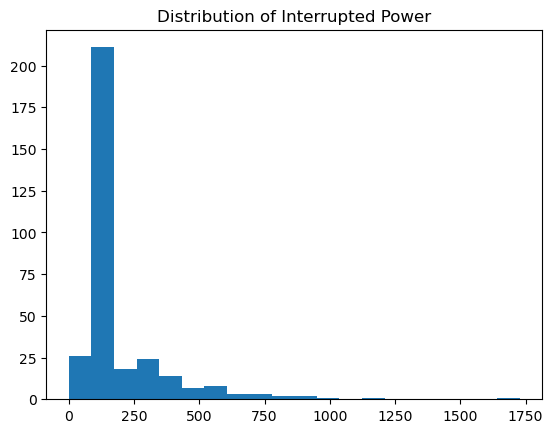

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.hist(Data['INTERRUPTED POWER'].dropna(), bins=20)
plt.title("Distribution of Interrupted Power")
plt.show()

In [8]:
skewness = Data['INTERRUPTED POWER'].skew()
print(f"Skewness: {skewness:.2f}")

Skewness: 3.63


In [9]:
# Replace typo "1`056.8" with 1056.8
Data['INTERRUPTED POWER'] = Data['INTERRUPTED POWER'].replace('1`056.8', 1056.8)

Replacing Nil with average 

In [10]:
median = Data['INTERRUPTED POWER'].median()
Data['INTERRUPTED POWER'] = Data['INTERRUPTED POWER'].fillna(median)

In [11]:
Data.head(20)

,Highest Frequency,Lowest Frequency,Highest Voltage,Lowest Voltage,PEAK GENERATION,LOWEST GENERATION,INTERRUPTED POWER,EQUIPMENT HEALTH,WEATHER CONDITION,FAULTS,TRANSMISSION LINE
0,50.000,49.000,349.0,300.0,4531.50,3784.70,414.0,Nil,RAINFALL,YES,Omotosho/Ikeja-West 330kV line
1,50.847,49.010,349.0,300.0,4482.50,3955.47,153.0,Nil,RAINFALL,Nil,Nil
2,50.983,49.010,358.0,300.0,4579.60,3231.80,153.0,POWER TRANSFORMER,RAINFALL,Nil,Nil
3,50.960,49.010,353.0,300.0,4552.76,3890.10,483.7,CIRCUIT BREAKER,RAINFALL,YES,Osogbo/Ikeja-West 330kV line
4,50.820,49.010,355.0,300.0,4204.80,3929.00,373.8,Nil,RAINFALL,YES,Shiroro/Katampe 330kV line
5,50.710,49.012,350.0,300.0,4275.24,3853.50,148.7,INSULATOR,RAINFALL,Nil,Nil
6,50.629,49.000,347.0,300.0,4372.20,3989.50,24.0,Nil,RAINFALL,Nil,Nil
7,50.551,49.029,345.0,300.0,4657.90,4104.72,231.0,Nil,RAINFALL,YES,Benin/Ajaokuta 330kV line 2
8,50.720,49.479,360.0,300.0,4634.80,3533.90,153.0,Nil,RAINFALL,Nil,Nil
9,51.140,49.145,352.0,300.0,4484.24,3329.80,92.0,Nil,RAINFALL,YES,Onitsha/Alaoji 330kV line


Labelling Categorical variables

In [12]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ["FAULTS", "EQUIPMENT HEALTH", "WEATHER CONDITION","TRANSMISSION LINE"]
for col in categorical_columns:
    le = LabelEncoder()
    Data[col] = le.fit_transform(Data[col])
    label_encoders[col] = le  


In [13]:
Data.head(10)

,Highest Frequency,Lowest Frequency,Highest Voltage,Lowest Voltage,PEAK GENERATION,LOWEST GENERATION,INTERRUPTED POWER,EQUIPMENT HEALTH,WEATHER CONDITION,FAULTS,TRANSMISSION LINE
0,50.000,49.000,349.0,300.0,4531.50,3784.70,414.0,10,1,1,49
1,50.847,49.010,349.0,300.0,4482.50,3955.47,153.0,10,1,0,43
2,50.983,49.010,358.0,300.0,4579.60,3231.80,153.0,11,1,0,43
3,50.960,49.010,353.0,300.0,4552.76,3890.10,483.7,2,1,1,55
4,50.820,49.010,355.0,300.0,4204.80,3929.00,373.8,10,1,1,57
5,50.710,49.012,350.0,300.0,4275.24,3853.50,148.7,6,1,0,43
6,50.629,49.000,347.0,300.0,4372.20,3989.50,24.0,10,1,0,43
7,50.551,49.029,345.0,300.0,4657.90,4104.72,231.0,10,1,1,13
8,50.720,49.479,360.0,300.0,4634.80,3533.90,153.0,10,1,0,43
9,51.140,49.145,352.0,300.0,4484.24,3329.80,92.0,10,1,1,50


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   365 non-null    float64
 1   Lowest Frequency    365 non-null    float64
 2   Highest Voltage     365 non-null    float64
 3   Lowest Voltage      365 non-null    float64
 4   PEAK GENERATION     365 non-null    float64
 5   LOWEST GENERATION   365 non-null    float64
 6   INTERRUPTED POWER   365 non-null    float64
 7   EQUIPMENT HEALTH    365 non-null    int32  
 8   WEATHER CONDITION   365 non-null    int32  
 9   FAULTS              365 non-null    int32  
 10  TRANSMISSION LINE   365 non-null    int32  
dtypes: float64(7), int32(4)
memory usage: 25.8 KB


In [15]:
# Remove spaces and convert to lowercase
Data.columns = Data.columns.str.replace(' ', '_').str.lower()
numeric_columns = [
    "highest_frequency_", 
    "lowest_frequency", 
    "highest_voltage", 
    "lowest_voltage", 
    "peak_generation", 
    "lowest_generation", 
    "interrupted_power"
]

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   highest_frequency_  365 non-null    float64
 1   lowest_frequency    365 non-null    float64
 2   highest_voltage     365 non-null    float64
 3   lowest_voltage      365 non-null    float64
 4   peak_generation     365 non-null    float64
 5   lowest_generation   365 non-null    float64
 6   interrupted_power   365 non-null    float64
 7   equipment_health    365 non-null    int32  
 8   weather_condition   365 non-null    int32  
 9   faults              365 non-null    int32  
 10  transmission_line   365 non-null    int32  
dtypes: float64(7), int32(4)
memory usage: 25.8 KB


Scaling Numerical Value 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data[numeric_columns] = scaler.fit_transform(Data[numeric_columns])

In [18]:
Data.head(10)

,highest_frequency_,lowest_frequency,highest_voltage,lowest_voltage,peak_generation,lowest_generation,interrupted_power,equipment_health,weather_condition,faults,transmission_line
0,-3.311125,-0.543759,-0.148851,0.012512,-0.169041,-0.432796,1.211091,10,1,1,49
1,1.350415,-0.490916,-0.148851,0.012512,-0.211550,-0.092930,-0.313675,10,1,0,43
2,2.098903,-0.490916,1.871715,0.012512,-0.127313,-1.533177,-0.313675,11,1,0,43
3,1.972320,-0.490916,0.749178,0.012512,-0.150597,-0.223029,1.618279,2,1,1,55
4,1.201818,-0.490916,1.198193,0.012512,-0.452461,-0.145611,0.976242,10,1,1,57
5,0.596423,-0.480348,0.075656,0.012512,-0.391352,-0.295871,-0.338795,6,1,0,43
6,0.150632,-0.543759,-0.597866,0.012512,-0.307237,-0.025204,-1.067294,10,1,0,43
7,-0.278647,-0.390515,-1.046881,0.012512,-0.059386,0.204107,0.142003,10,1,1,13
8,0.651459,1.987408,2.320730,0.012512,-0.079426,-0.931938,-0.313675,10,1,0,43
9,2.962966,0.222461,0.524671,0.012512,-0.210040,-1.338138,-0.670037,10,1,1,50


Feature Engineering

In [19]:
# Feature Engineering: Creating interaction and derived features
Data["Voltage Range"] = Data["highest_voltage"] - Data["lowest_voltage"]
Data["Frequency Range"] = Data["highest_frequency_"] - Data["lowest_frequency"]
Data["Power Generation Range"] = Data["peak_generation"] - Data["lowest_generation"]
Data["Normalized Power Interruptions"] = Data["interrupted_power"] / (Data["peak_generation"] + 1e-6)

In [28]:
Data.head(10)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   highest_frequency_              365 non-null    float64
 1   lowest_frequency                365 non-null    float64
 2   highest_voltage                 365 non-null    float64
 3   lowest_voltage                  365 non-null    float64
 4   peak_generation                 365 non-null    float64
 5   lowest_generation               365 non-null    float64
 6   interrupted_power               365 non-null    float64
 7   equipment_health                365 non-null    int32  
 8   weather_condition               365 non-null    int32  
 9   faults                          365 non-null    int32  
 10  transmission_line               365 non-null    int32  
 11  Voltage Range                   365 non-null    float64
 12  Frequency Range                 365 

Data training 

In [21]:
from sklearn.model_selection import train_test_split
# Features
X = Data.drop(columns=["faults"]) 
# Target variable 
y = Data["faults"]  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_train

,highest_frequency_,lowest_frequency,highest_voltage,lowest_voltage,peak_generation,lowest_generation,interrupted_power,equipment_health,weather_condition,transmission_line,Voltage Range,Frequency Range,Power Generation Range,Normalized Power Interruptions
211,-0.355698,0.148481,-0.148851,0.012512,0.004108,0.460066,-0.313675,7,0,50,-0.161363,-0.504179,-0.455958,-76.334921
340,-0.355698,0.148481,-0.148851,0.012512,0.004108,0.460066,-0.313675,7,0,50,-0.161363,-0.504179,-0.455958,-76.334921
202,-0.355698,0.148481,-0.148851,0.012512,0.004108,0.460066,-0.313675,7,0,50,-0.161363,-0.504179,-0.455958,-76.334921
75,-0.053000,-0.300682,0.749178,0.012512,-0.321985,-0.974130,-0.313675,2,1,19,0.736666,0.247682,0.652145,0.974192
84,1.394444,2.251622,3.443267,-0.728050,-0.089315,-1.963657,-0.044942,10,1,24,4.171316,-0.857178,1.874342,0.503187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.761531,-0.358809,2.320730,0.012512,-0.220598,-1.937785,-0.313675,4,1,19,2.308218,1.120340,1.717187,1.421936
106,-5.666661,2.256906,-0.373359,0.012512,0.368737,-0.416079,-0.453883,11,1,43,-0.385871,-7.923567,0.784816,-1.230909
270,-0.355698,0.148481,-0.148851,0.012512,0.004108,0.460066,-0.313675,7,0,50,-0.161363,-0.504179,-0.455958,-76.334921
348,-0.355698,0.148481,-0.148851,0.012512,0.004108,0.460066,-0.313675,7,0,50,-0.161363,-0.504179,-0.455958,-76.334921


In [23]:
!pip install lightgbm

Model selection

In [24]:
# Models to compare
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric="logloss"),
    'LightGBM': LGBMClassifier(min_gain_to_split=0.01),
    "SVM": SVC()
}

In [25]:
# Train and Evaluate Models
from sklearn.metrics import accuracy_score, classification_report
best_model = None
best_score = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    precision_score(y_test, y_pred, zero_division=1)
    print(f"{name} Accuracy: {score:.4f}")
    print(classification_report(y_test, y_pred))
    
    if score > best_score:
        best_score = score
        best_model = model

Logistic Regression Accuracy: 0.8356
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.85      0.96      0.90        57

    accuracy                           0.84        73
   macro avg       0.80      0.67      0.70        73
weighted avg       0.83      0.84      0.81        73

Random Forest Accuracy: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.96      0.98        57

    accuracy                           0.97        73
   macro avg       0.94      0.98      0.96        73
weighted avg       0.98      0.97      0.97        73

XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        57

    accuracy                           1.00        73
   macro avg       1.00      1.00  

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hyperparameter for Random forest


In [26]:
from sklearn.model_selection import RandomizedSearchCV

#  hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest model
rf = RandomForestClassifier(random_state=42)

#  Search Cross-Validation
tuner = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
tuner.fit(X_train, y_train)

# best model
best_rf = tuner.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f" Random Forest Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


 Random Forest Accuracy: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.96      0.98        57

    accuracy                           0.97        73
   macro avg       0.94      0.98      0.96        73
weighted avg       0.98      0.97      0.97        73



Save model

In [27]:
import joblib
joblib.dump(best_rf, "best_model.pkl")
print("Best model saved as best_model.pkl")


Best model saved as best_model.pkl
